# 7.2. Visualizing Numerical Distributions

- data: quantitative/numerical
- Vis: histogram
- A bar graph is used to compare discrete or categorical variables in a graphical format whereas a histogram depicts the frequency distribution of variables in a dataset.

In [1]:
##### headers
from datascience import *     ### works but discouraged
import numpy as np
path_data = '../data/'

In [2]:
##### the dataset: top movies 2017
top = Table.read_table(path_data + 'top_movies_2017.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)
# top
######### set_format #####

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [3]:
##### visualizing numerical variables
##### tbl.with_columns(labels_values, formatter): Return a table with additional or replaced columns
##### https://www.data8.org/datascience/_autosummary/datascience.tables.Table.with_columns.html#datascience.tables.Table.with_columns
##### 1e6 = 1,000,000 == 1 mil
millions = top.select(0).with_columns('Adjusted Gross', 
                                      np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


## 7.2.1. Binning the Data
- bin: group the values into intervals; the bin() method

In [4]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)
# round(min(adj_gross)), round(max(adj_gross))


(338.41000000000003, 1796.1800000000001)

In [5]:
##### bins of width 100, starting at 300 and going to 2000
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


In [6]:
##### default is to produce 10 
millions.bin('Adjusted Gross').show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


In [7]:
#### 4 bins

millions.bin('Adjusted Gross', bins=4)

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


## 7.2.2. Histogram

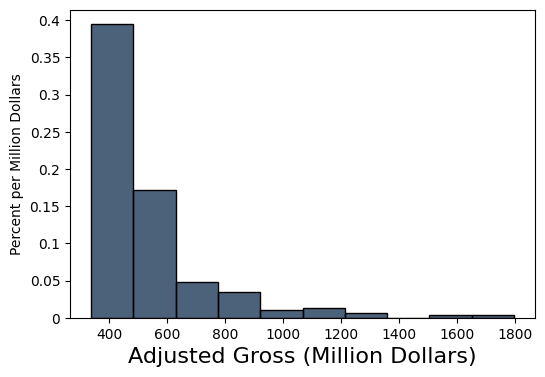

In [8]:
### display plots inline:
%matplotlib inline    
millions.hist('Adjusted Gross', unit="Million Dollars")

##### two numerical axes
#####  the vertical axis does not represent percents

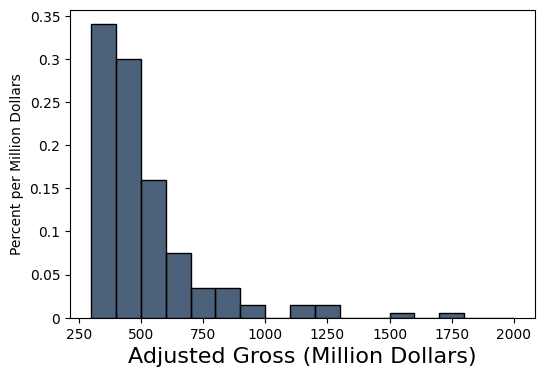

In [9]:
##### np.arange: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
##### Return evenly spaced values within a given interval
##### np.arange(START, STOP, STEP)

millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

##### skewed to the right

## 7.2.3. The Horizontal Axis

- hist() uses the same endpoint convention as the bin method.
- Bins include the data at their left endpoint, but not the data at their right endpoint, except for the rightmost bin which includes both endpoints

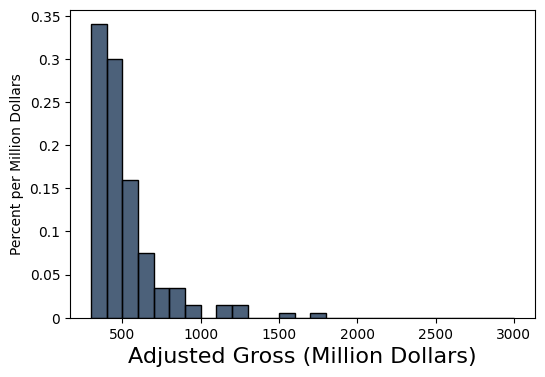

In [14]:
##### set bins: bins=np.arange(START, STOP, STEP)
millions.hist('Adjusted Gross', bins=np.arange(300, 3001, 100), unit="Million Dollars")

### skewed; long right hand tail

## 7.2.4. The Area Principle

- axes of a histogram are numerical, so you can do arithmetic on them
- The area principle of visualization says that when we represent a magnitude by a figure that has two dimensions, such as a rectangle, then the area of the figure should represent the magnitude.

## 7.2.5. The Histogram: General Principles and Calculation

Histograms follow the area principle and have two defining properties:
- The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical and therefore have fixed positions on the number line.
- The area of each bar is proportional to the number of entries in the bin.
- The vertical axis is said to be on the density scale.

## 7.2.6. The Vertical Axis: Density Scale

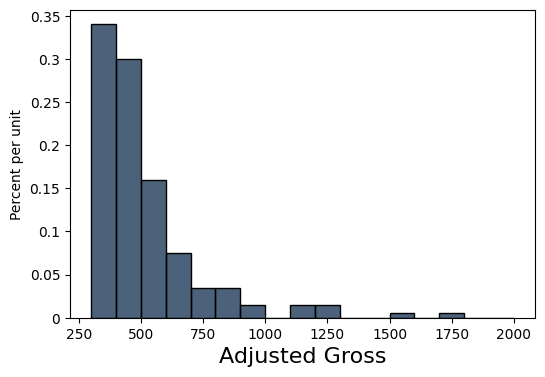

In [42]:
millions.hist('Adjusted Gross', bins=np.arange(300, 2001, 100))
    
### numpy.arange([start, ]stop, [step, ]dtype=None, *, device=None, like=None)
### https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [27]:
# bin_counts
# bin_counts.show(max_rows=3)     ### same as show()
bin_counts.show(3)

### Table.show(max_rows=0)[source]
### Display the table.

bin,Adjusted Gross count
300,68
400,60
500,32


## 7.2.7. Why Not Simply Plot the Counts?


## 7.2.8. Flat Tops and the Level of Detail

- some detail is lost by grouping values into bins

In [40]:
# from datascience.predicates import *
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

NameError: name 'uneven' is not defined

In [41]:
histogram_elements = millions.bin('Adjusted Gross', bins=uneven).relabled(1, 'count')
histogram_elements

NameError: name 'uneven' is not defined

## 7.2.9. Computing All Heights

## 7.2.10. Differences Between Bar Charts and Histograms

- Bar charts display one numerical quantity per category. They are often used to display the distributions of categorical variables. Histograms display the distributions of quantitative variables.
- All the bars in a bar chart have the same width, and there is an equal amount of space between consecutive bars. The bars can be in any order because the distribution is categorical. The bars of a histogram are contiguous; the bins are drawn to scale on the number line.
- The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the count in each category. The heights of bars in a histogram measure densities; the areas of bars in a histogram are proportional to the counts in the bins.
